In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\Mgyu\\BIPA_data.csv",index_col = 0)

In [3]:
data = data[data['result'] != 'UNKNOWN']

In [4]:
not_sup = data[data['position'] != 'S']

In [5]:
sup = data[data['position'] == 'S']

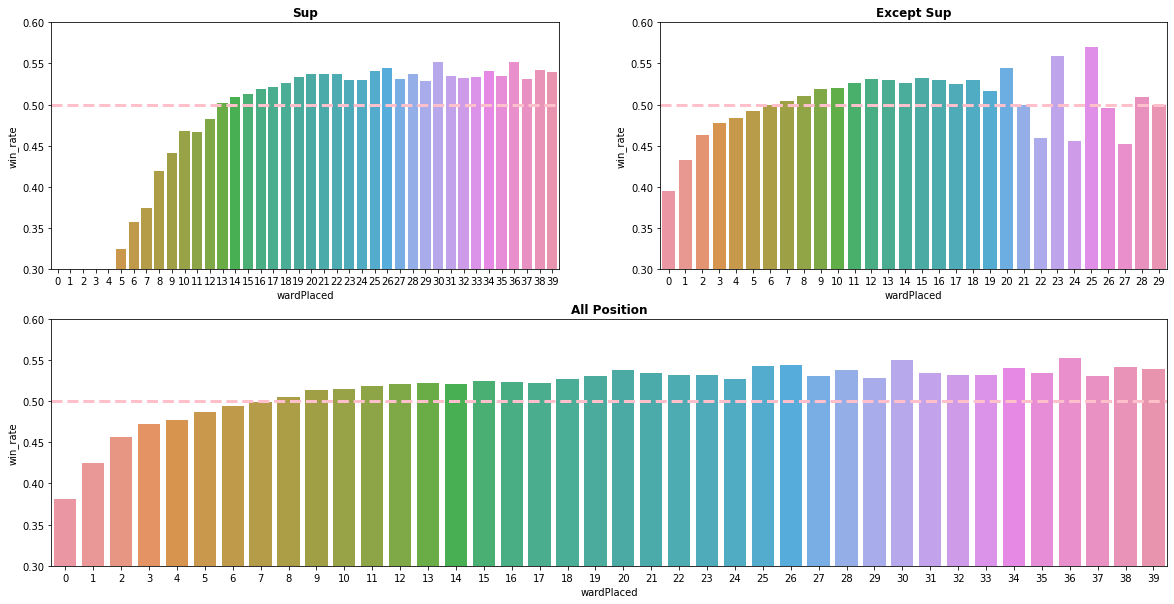

In [7]:
plt.figure(figsize = (20,10))

for x,y,z in zip([212,222,221], [data, not_sup, sup], ['All Position', 'Except Sup', 'Sup']):
    wardPlaced = y['wardPlaced'].value_counts()
    ward_win = []
    for i in wardPlaced[wardPlaced > 50].index:
        win = y.value_counts(['wardPlaced', 'result'])[i]['WIN']
        lose = y.value_counts(['wardPlaced', 'result'])[i]['LOSE']
        win_rate = win/(win+lose)
        ward_win.append({'wardPlaced': i, 'win_rate' : win_rate})
    ward_win = pd.DataFrame(ward_win)
    
    plt.subplot(x)
    sns.barplot(data = ward_win[ward_win['wardPlaced'] < 40], x = 'wardPlaced', y = 'win_rate').set_ylim(0.3,0.6)
    plt.axhline(0.5, ls = '--', lw = 3, color = 'pink')
    plt.title(z, weight = 'bold')